### Behavioral Analyses (Figure 1)

In [2]:
#Get all of the subjects from the two groups
import numpy as np
import csv

tbi_subs = []
match_subs = []
match2_subs = []
with open('/home1/richad/TBI_Paper_Analysis/tbi3.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for rows in reader:  
        tbi_subs.append(rows[2])

with open('/home1/richad/TBI_Paper_Analysis/best_matches3.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for rows in reader:  
        match_subs.append(rows[2])    
        match2_subs.append(rows[2]) 
        
with open('/home1/richad/TBI_Paper_Analysis/second_best_matches3.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for rows in reader:      
        match2_subs.append(rows[2]) 
with open('/home1/richad/TBI_Paper_Analysis/third_best_matches3.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for rows in reader:      
        match2_subs.append(rows[2]) 

In [11]:
#All the necessary functions to load the data into a format compatible with the behavioral toolbox

def getInfo(subs,exp):
    import numpy as np
    # Start CML Readers
    from cmlreaders import CMLReader, get_data_index
    df = get_data_index("r1")
    recalls = []
    subjects= []
    for sub in subs:
        # Get RAM Data
        if exp in np.array(df[df['subject']==sub]['experiment']):
            #Find out the sessions, localization, and montage for this subject
            sessions = list(df[(df['subject']==sub) & (df['experiment']==exp)]['session'])
            mont = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['montage'])
            loc = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['localization'])
            for sess in sessions:
                #Get the data for this one subject
                reader = CMLReader(sub, exp, sess, montage=mont, localization=loc)   #reader for loading CML data
                evs = reader.load('task_events') 
                evs = evs[(evs['type']=='WORD') & (evs['recalled']==1) & (evs['serialpos'] != -999) & (evs['list']!=-1)]
                for l in np.unique(evs['list']):
                    recalls.append(np.array(evs[evs['list']==l]['serialpos']))
                    subjects.append(np.array(evs['subject'])[0])
    return(recalls,subjects)

def getIntrusion(subs,exp):
    import numpy as np
    # Start CML Readers
    from cmlreaders import CMLReader, get_data_index
    # Get RAM Data
    df = get_data_index("r1")
    intrusionRate= []
    intrusionRate_sess= []
    for sub in subs:
        intrusions = []
        intrusions_sess = []
        if exp in np.array(df[df['subject']==sub]['experiment']):
            #Find out the sessions, localization, and montage for this subject
            sessions = list(df[(df['subject']==sub) & (df['experiment']==exp)]['session'])
            mont = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['montage'])
            loc = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['localization'])

            for sess in sessions:
                #Get the data for this one subject
                reader = CMLReader(sub, exp, sess, montage=mont, localization=loc)   #reader for loading CML data
                evs = reader.load('task_events') 
                intrusions_sess.append(np.sum(evs['intrusion']>0) + np.sum(evs[evs['intrusion']==-1]['item_name'] != '<>'))
                for l in np.unique(evs['list']):
                    if l>0:
                        list_evs=evs[evs['list']==l]
                        intrusions.append(np.sum(list_evs['intrusion']>0) + np.sum(list_evs[list_evs['intrusion']==-1]['item_name'] != '<>'))
            intrusionRate.append(np.mean(intrusions, axis =0)) # Number of intrusions per list for each subject
            intrusionRate_sess.append(np.mean(intrusions_sess, axis =0)) # Number of intrusions per session for each subject
    return(intrusionRate)
def getClusterInfo(subs,exp):
    import numpy as np
    # Start CML Readers
    from cmlreaders import CMLReader, get_data_index
    recalls = []
    subjects= []
    for s in subs:
        sub=s
        # Get RAM Data
        df = get_data_index("r1")
        if exp in np.array(df[df['subject']==sub]['experiment']):
            #Find out the sessions, localization, and montage for this subject
            sessions = list(df[(df['subject']==sub) & (df['experiment']==exp)]['session'])
            mont = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['montage'])
            loc = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['localization'])
            for sess in sessions:
                #Get the data for this one subject
                reader = CMLReader(sub, exp, sess)   #reader for loading CML data
                evs = reader.load('task_events') 
                evs = evs[(evs['type']=='REC_WORD') & (evs['list']!=-1)]
                for l in np.unique(evs['list']):
                    r=[ -1 if x==-999 else x for x in np.array(evs[evs['list']==l]['serialpos'])]
                    recalls.append(r)
                    subjects.append(np.array(evs['subject'])[0])
                    
    return(recalls,subjects)

def pad_data(recalls):
    lengths = []
    for i in recalls:
        lengths.append(len(i))
    maxl = max(lengths)
    recalls_pad=np.zeros([np.shape(recalls)[0],maxl])
    for i in range(np.shape(recalls)[0]):
        recalls_pad[i][:lengths[i]]=recalls[i]
    return(recalls_pad)

### Serial Position

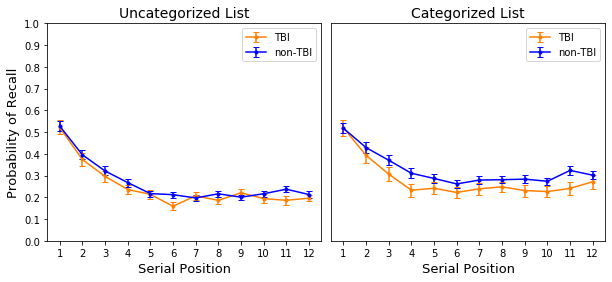

In [4]:
#Plot serial position curves

tbi_fr1_recalls, tbi_fr1_subjects = getInfo(tbi_subs,'FR1')
tbi_catfr1_recalls, tbi_catfr1_subjects = getInfo(tbi_subs,'catFR1')

match2_fr1_recalls, match2_fr1_subjects = getInfo(match2_subs,'FR1')
match2_catfr1_recalls, match2_catfr1_subjects = getInfo(match2_subs,'catFR1')

import numpy as np
%matplotlib inline
from pylab import *
import seaborn as sns
import pybeh.spc as spc

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

gs=GridSpec(1,10)

p_recall_fr1_tbi = spc.spc(tbi_fr1_recalls, tbi_fr1_subjects, 12)
p_recall_fr1_match2 = spc.spc(match2_fr1_recalls, match2_fr1_subjects, 12)
fig=plt.figure(figsize=(10,4))
from scipy.stats import sem

ax1=fig.add_subplot(gs[0,0:5]) # First row, first column
errorbar(np.arange(12)+1, np.mean(p_recall_fr1_tbi,axis=0), yerr = sem(p_recall_fr1_tbi,axis=0), color = (1,.5,0), capsize = 3,marker='.')
ylim(0,1)
yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
xlabel('Serial Position',fontsize=13)
ylabel('Probability of Recall',fontsize=13)
xticks(arange(13))
errorbar(np.arange(12)+1, np.mean(p_recall_fr1_match2,axis=0), yerr = sem(p_recall_fr1_match2,axis=0), color = (0,0,1), capsize = 3,marker='.')
legend(('TBI','non-TBI'))
title('Uncategorized List',fontsize=14)

p_recall_catfr1_tbi = spc.spc(tbi_catfr1_recalls, tbi_catfr1_subjects, 12)
p_recall_catfr1_match2 = spc.spc(match2_catfr1_recalls, match2_catfr1_subjects, 12)
ax2=fig.add_subplot(gs[0,5:10]) # First row, first column
from scipy.stats import sem
errorbar(np.arange(12)+1, np.mean(p_recall_catfr1_tbi,axis=0), yerr = sem(p_recall_catfr1_tbi,axis=0), color = (1,0.5,0), capsize = 3,marker='.')
ylim(0,1)
xticks(arange(13))
xlabel('Serial Position',fontsize=13)
errorbar(np.arange(12)+1, np.mean(p_recall_catfr1_match2,axis=0), yerr = sem(p_recall_catfr1_match2,axis=0), color = (0,0,1),capsize = 3,marker='.')
legend(('TBI','non-TBI'))
yticks([])
title('Categorized List',fontsize=14)
savefig("spc.pdf",dpi=300, bbox_inches = "tight")

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

def lrtest(llmin, llmax,df = 1):
    lr = 2 * (llmax - llmin)
    if llmax<llmin:
         raise ValueError('Check assumptions.')
    stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
    p = stats.chisqprob(lr, df) 
    return lr, p

# Set up a data Frame in long format
recall_info = {}
recall_info['recall']= np.concatenate([np.ravel(p_recall_fr1_tbi),np.ravel(p_recall_catfr1_tbi),np.ravel(p_recall_fr1_match2),np.ravel(p_recall_catfr1_match2)])
recall_info['group']=np.concatenate([['TBI']*np.size(p_recall_fr1_tbi),['TBI']*np.size(p_recall_catfr1_tbi),['non-TBI']*np.size(p_recall_fr1_match2),['non-TBI']*np.size(p_recall_catfr1_match2)])
recall_info['task']=np.concatenate([['fr']*np.size(p_recall_fr1_tbi),['catfr']*np.size(p_recall_catfr1_tbi),['fr']*np.size(p_recall_fr1_match2),['catfr']*np.size(p_recall_catfr1_match2)])
recall_info['position'] = np.tile(np.arange(1,13),int(np.shape(recall_info['recall'])[0]/12))
subs = np.concatenate([np.unique(tbi_fr1_subjects),np.unique(tbi_catfr1_subjects),np.unique(match2_fr1_subjects),np.unique(match2_catfr1_subjects)])
recall_info['subject'] = np.repeat(subs,12)
import pandas as pd
recall_info = pd.DataFrame(recall_info)
recall_info.to_csv('recall_info.csv')
# task (‘FR’,’catFR’), TBI (‘yes’,’no’), subject (e.g. ‘R1111M’) and recall (probability of recall) are vectors or lists that contain one entry per observation (if a subject did both tasks that subject gets two rows/entries); there are several ways to set up a data frame in long format.
df = pd.DataFrame(recall_info)

# Set up model with main effects only; look at summary table to assess direction of effects; get likelihood for likelihood ratio tests
model = sm.MixedLM.from_formula("recall ~ C(task) + C(group) + C(position)", groups="subject", data=df) 
result = model.fit(reml = False, method = 'nm'  )
llf_full = result.llf
print(result.summary())

# Drop each main effect and get likelihood of reduced models for likelihood ratio tests
model = sm.MixedLM.from_formula("recall ~  C(group) + C(position)", groups="subject", data=df) 
result = model.fit(reml = False,method = 'nm' )
llf_task = result.llf

model = sm.MixedLM.from_formula("recall ~  C(task) + C(position)", groups="subject", data=df) 
result = model.fit(reml = False,method = 'nm')
llf_tbi = result.llf

model = sm.MixedLM.from_formula("recall ~  C(task) + C(group)", groups="subject", data=df) 
result = model.fit(reml = False,method = 'nm')
llf_position = result.llf
                   
# Likelihood ratio tests for main effects
print('Main effect of task')
lr, p = lrtest(llf_task, llf_full, df = 1) # Degrees of freedom = number of regressors (i.e. columns in summary table) added when including the effect of interest, for categorical variable with two groups this is df = 1
print('LR test, p value: {:.2f}, {:.4f}'.format(lr, p))

print('Main effect of TBI')
lr, p = lrtest(llf_tbi, llf_full, df = 1)
print('LR test, p value: {:.2f}, {:.4f}'.format(lr, p))

print('Main effect of Tserial position')
lr, p = lrtest(llf_position, llf_full, df = 11)
print('LR test, p value: {:.2f}, {:.4f}'.format(lr, p))


# Set up model with all interactions; get likelihood for likelihood ratio tests
model = sm.MixedLM.from_formula("recall ~ C(task) + C(group) + C(position) + C(task)*C(group) + C(task)*C(position) + C(group)*C(position)", groups="subject", data=df)
result = model.fit(reml = False,method = 'nm')
llf_full = result.llf
print(result.summary())

# Drop each interaction effect and get likelihood of reduced models for likelihood ratio tests
model = sm.MixedLM.from_formula("recall ~ C(task) + C(group) +C(position) + C(task)*C(position) + C(group)*C(position)", groups="subject", data=df)
result = model.fit(reml = False,method = 'nm')
llf_inter1 = result.llf

print('task x group')
lr, p = lrtest(llf_inter1, llf_full, df = 1) # Important: Check summary table for number of regressors added to model the interaction and replace X with that number.
print('LR test, p value: {:.2f}, {:.4f}'.format(lr, p))


### Temporal Clustering

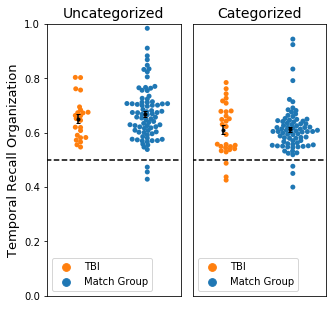

In [12]:
#Plot temporal clustering
#get recalls and subjects in right format, padded with zeros
tbi_fr1_recalls, tbi_fr1_subjects = getClusterInfo(tbi_subs,'FR1')
tbi_catfr1_recalls, tbi_catfr1_subjects = getClusterInfo(tbi_subs,'catFR1')

match_fr1_recalls, match_fr1_subjects = getClusterInfo(match2_subs,'FR1')
match_catfr1_recalls, match_catfr1_subjects = getClusterInfo(match2_subs,'catFR1')
#
tbi_fr1_recalls_pad = pad_data(tbi_fr1_recalls)
tbi_catfr1_recalls_pad = pad_data(tbi_catfr1_recalls)

match_fr1_recalls_pad = pad_data(match_fr1_recalls)
match_catfr1_recalls_pad = pad_data(match_catfr1_recalls)

#use behavioral toolbox
import pybeh.temp_fact as tf
cluster_fr1_tbi = tf.temp_fact(tbi_fr1_recalls_pad, tbi_fr1_subjects,12)
cluster_catfr1_tbi = tf.temp_fact(tbi_catfr1_recalls_pad, tbi_catfr1_subjects,12)

cluster_fr1_match = tf.temp_fact(match_fr1_recalls_pad, match_fr1_subjects,12)
cluster_catfr1_match = tf.temp_fact(match_catfr1_recalls_pad, match_catfr1_subjects,12)

#Put in dictionary in order to make seaborn swarm plot
clustering_df_uncat = {}
clustering_df_uncat['value'] = np.concatenate([cluster_fr1_tbi, cluster_fr1_match])
clustering_df_uncat['sub']=np.concatenate([['TBI']*np.shape(cluster_fr1_tbi)[0],['Match Group']*np.shape(cluster_fr1_match)[0]])
clustering_df_cat = {}
clustering_df_cat['value'] = np.concatenate([cluster_catfr1_tbi, cluster_catfr1_match])
clustering_df_cat['sub']=np.concatenate([['TBI']*np.shape(cluster_catfr1_tbi)[0],['Match Group']*np.shape(cluster_catfr1_match)[0]])

#plot
import seaborn as sns
%matplotlib inline
from pylab import *
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import scipy.stats as stats
fig=plt.figure(figsize=(5,5))
gs=GridSpec(1,4)

fig1=fig.add_subplot(gs[0,0:2]) # First row, first column
errorbar(-.04,np.mean(cluster_fr1_tbi),yerr=stats.sem(cluster_fr1_tbi),marker='.',capsize=2,color='k',zorder=10)
errorbar(.96,np.nanmean(cluster_fr1_match),yerr=stats.sem(cluster_fr1_match,nan_policy='omit'),marker='.',capsize=2,color='k',zorder=10)
ax1=sns.swarmplot(x = 'sub',y='value',hue='sub',data = clustering_df_uncat,palette= np.flip(np.array(sns.color_palette(n_colors=2)),axis=0))
ax1.set_ylim([0,1])
hlines(.5,-1,2,linestyle='--')
ylabel('Temporal Recall Organization',fontsize=13)
legend(loc='lower left',fontsize=10)
title('Uncategorized',fontsize=14)
xticks([])
yticks(fontsize=10)

fig2=fig.add_subplot(gs[0,2:4]) 
errorbar(-.04,np.mean(cluster_catfr1_tbi),yerr=stats.sem(cluster_catfr1_tbi),marker='.',capsize=2,color='k',zorder=10)
errorbar(.96,np.mean(cluster_catfr1_match),yerr=stats.sem(cluster_catfr1_match),marker='.',capsize=2,color='k',zorder=10)
ax2=sns.swarmplot(x = 'sub',y='value',hue='sub',data = clustering_df_cat,palette= np.flip(np.array(sns.color_palette(n_colors=2)),axis=0))
ax2.set_ylim([0,1])
hlines(.5,-1,2,linestyle='--')
title('Categorized',fontsize=14)
yticks([])
xticks([])
#ax2.legend().set_visible(False)

savefig("tempCluster.pdf",dpi=300, bbox_inches = "tight")

In [13]:
#Statistical testing:
#Similar to recall rates, I used an anova to determine if there was an interaction between task and group.
cluster_info = {}
cluster_info['value']= np.concatenate([cluster_fr1_tbi,cluster_catfr1_tbi,cluster_fr1_match,cluster_catfr1_match])
cluster_info['group']=np.concatenate([['TBI']*np.shape(cluster_fr1_tbi)[0],['TBI']*np.shape(cluster_catfr1_tbi)[0],['non-TBI']*np.shape(cluster_fr1_match)[0],['non-TBI']*np.shape(cluster_catfr1_match)[0]])
cluster_info['condition']=np.concatenate([['uncat']*np.shape(cluster_fr1_tbi)[0],['cat']*np.shape(cluster_catfr1_tbi)[0],['uncat']*np.shape(cluster_fr1_match)[0],['cat']*np.shape(cluster_catfr1_match)[0]])

import pandas as pd
cluster_info = pd.DataFrame(cluster_info)

import statsmodels
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'value ~ C(group) + C(condition) + C(group):C(condition)'
model = ols(formula, cluster_info).fit()
aov_table = anova_lm(model, typ=3)
print(aov_table)


                          sum_sq     df            F        PR(>F)
Intercept              10.843853    1.0  1300.296111  3.308688e-90
C(group)                0.000027    1.0     0.003281  9.543808e-01
C(condition)            0.020953    1.0     2.512513  1.145022e-01
C(group):C(condition)   0.002567    1.0     0.307871  5.796006e-01
Residual                1.692924  203.0          NaN           NaN


In [14]:
#Nothing was significant so I collapsed across task and used a t-test to determine signficance.
#no interaction or significance, so combine categorized and uncategorized
cluster_tbi = np.concatenate([cluster_fr1_tbi,cluster_catfr1_tbi])
cluster_nonTbi = np.concatenate([cluster_fr1_match,cluster_catfr1_match])

from scipy.stats import ttest_ind
ttest_ind(cluster_tbi,cluster_nonTbi, nan_policy='omit',equal_var=False)

#Again there is no difference between the groups

Ttest_indResult(statistic=-0.8418332195705154, pvalue=0.40198273236757764)

### Semantic Clustering (ARC)

ARC Caulcation <br /> 
ARC=(R-Er)/(maxr-Er)  <br /> 
maxr=N-k  <br /> 
(N = total number of items recalled, and  k = number of recalled categories )  <br /> 
Er=(sum(n^2)/N)-1  <br /> 
R = total number of observed category repetitions (i.e., the number oftimes a category item follows an item from the same category)  <br /> 
maxr = maximum possible number of cate-gory repetitions, and <br /> 
E(R) = expected (chance) number of category repetitions.  <br /> 
ni = number of items recalled fromCategory i, a

In [16]:
#Calculate ARC for CatFR1
from cmlreaders import CMLReader, get_data_index
df = get_data_index("r1")

ARC_subs_tbi = []
for sub in tbi_subs:
    exp='FR1'
    sub_df=df[df['subject']==sub]
    exp_list = np.array(sub_df[(sub_df['experiment']=='FR1') | (sub_df['experiment']=='catFR1')]['experiment'])
    if len(exp_list)>0:
        if sum(exp_list=='catFR1')>0:
            exp='catFR1'
    if exp == 'catFR1':
        #Get subject info
        sessions = list(df[(df['subject']==sub) & (df['experiment']==exp)]['session'])
        mont = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['montage'])
        loc = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['localization'])

        ARC=[]
        for sess in sessions[:]:
            #For first session...
            reader = CMLReader(sub, exp, sess, montage=mont, localization=loc)   #reader for loading CML data
            evs = reader.load('task_events')
            pairs=reader.load('pairs')
            #Only get encoding events
            evs = reader.load('task_events') 
            rec_word_evs = evs[evs['type']=='REC_WORD']
            for l in np.unique(evs['list']):
                if l>0:
                    r=np.array([ -1 if x==-999 else x for x in np.array(rec_word_evs[rec_word_evs['list']==l]['serialpos'])])
                    N = sum(r>0)
                    if N>0:
                        k_array = np.array(rec_word_evs[rec_word_evs['list']==l]['category'][r>0])
                        k = len(np.unique(k_array))
                        maxr= N-k
                        R=0
                        for i in range(len(k_array)):
                            if i>0:
                                if k_array[i]==k_array[i-1]:
                                    R = R+1
                        ni=0
                        for c in np.unique(k_array):
                            ni=ni + np.square(sum(k_array==c))
                        Er=(ni/N)-1
                        arc=(R-Er)/(maxr-Er)
                        if arc>0:
                            ARC.append((R-Er)/(maxr-Er))      
        ARC_subs_tbi.append(np.nanmean(ARC))
        
ARC_subs_match = []
for sub in match2_subs:
    exp='FR1'
    sub_df=df[df['subject']==sub]
    exp_list = np.array(sub_df[(sub_df['experiment']=='FR1') | (sub_df['experiment']=='catFR1')]['experiment'])
    if len(exp_list)>0:
        if sum(exp_list=='catFR1')>0:
            exp='catFR1'
    if exp == 'catFR1':
        #Get subject info
        sessions = list(df[(df['subject']==sub) & (df['experiment']==exp)]['session'])
        mont = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['montage'])
        loc = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['localization'])

        ARC=[]
        for sess in sessions[:]:
            #For first session...
            reader = CMLReader(sub, exp, sess, montage=mont, localization=loc)   #reader for loading CML data
            evs = reader.load('task_events')
            pairs=reader.load('pairs')
            #Only get encoding events
            evs = reader.load('task_events') 
            rec_word_evs = evs[evs['type']=='REC_WORD']
            for l in np.unique(evs['list']):
                if l>0:
                    r=np.array([ -1 if x==-999 else x for x in np.array(rec_word_evs[rec_word_evs['list']==l]['serialpos'])])
                    N = sum(r>0)
                    if N>0:
                        k_array = np.array(rec_word_evs[rec_word_evs['list']==l]['category'][r>0])
                        k = len(np.unique(k_array))
                        maxr= N-k
                        R=0
                        for i in range(len(k_array)):
                            if i>0:
                                if k_array[i]==k_array[i-1]:
                                    R = R+1
                        ni=0
                        for c in np.unique(k_array):
                            ni=ni + np.square(sum(k_array==c))
                        Er=(ni/N)-1
                        arc=(R-Er)/(maxr-Er)
                        if arc>0:
                            ARC.append((R-Er)/(maxr-Er))        
        ARC_subs_match.append(np.nanmean(ARC))

/home1/richad/.conda/envs/cml/lib/python3.7/site-packages/cmlreaders/path_finder.py:239: MultiplePathsFoundWarning: Multiple files found: /protocols/r1/subjects/R1016M/localizations/0/montages/0/neuroradiology/current_processed/pairs.json
/data/eeg/R1016M/tal/R1016M_talLocs_database_bipol.mat returning the first file found
  warnings.warn(msg, MultiplePathsFoundWarning)
/home1/richad/.conda/envs/cml/lib/python3.7/site-packages/cmlreaders/readers/electrodes.py:236: MissingCoordinatesWarning: Could not load MNI coordinates
  "Could not load MNI coordinates"))
/home1/richad/.conda/envs/cml/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
/home1/richad/.conda/envs/cml/lib/python3.7/site-packages/cmlreaders/path_finder.py:239: MultiplePathsFoundWarning: Multiple files found: /protocols/r1/subjects/R1016M/localizations/0/montages/0/neuroradiology/current_processed/pairs.json
/data/eeg/R1016M/tal/R1016M_talLocs_database_bipol.ma

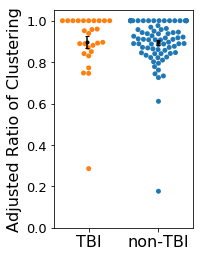

In [17]:
#plot ARC
from scipy.stats import ttest_ind
tstats, pvals = ttest_ind(ARC_subs_tbi, ARC_subs_match, equal_var=False, nan_policy='omit')
arc_df = {}
arc_df['value'] = np.concatenate([ARC_subs_tbi, ARC_subs_match])
arc_df['sub']=np.concatenate([['TBI']*np.shape(ARC_subs_tbi)[0],['non-TBI']*np.shape(ARC_subs_match)[0]])

import seaborn as sns
%matplotlib inline
from pylab import *
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import scipy.stats as stats
fig=plt.figure(figsize=(2.5,4))
ylim([0,1.05])
ylabel('Adjusted Ratio of Clustering',fontsize=16)
yticks(fontsize=13)
errorbar(-.02,np.nanmean(ARC_subs_tbi),yerr=stats.sem(ARC_subs_tbi,nan_policy='omit'),marker='.',capsize=2,color='k',zorder=10)
errorbar(.99,np.nanmean(ARC_subs_match),yerr=stats.sem(ARC_subs_match,nan_policy='omit'),marker='.',capsize=2,color='k',zorder=10)
ax=sns.swarmplot(x = 'sub',y='value',hue='sub',data =arc_df,palette= np.flip(np.array(sns.color_palette(n_colors=2)),axis=0))
ax.get_legend().set_visible(False)
xticks(fontsize=16)
#title('Categorized List',fontsize=18)
savefig("semCluster.pdf",dpi=300, bbox_inches = "tight")

In [18]:
#statistical testing
#Used a ttest to comapre the groups. not significant (p=0.9)
from scipy.stats import ttest_ind
print(np.shape(ARC_subs_tbi)[0]+np.shape(ARC_subs_match)[0])
ttest_ind(ARC_subs_tbi,ARC_subs_match,equal_var=False, nan_policy='omit')

105


Ttest_indResult(statistic=0.04450586534531758, pvalue=0.9647313091409122)

In [1]:
#Combined Plot
%matplotlib inline
from pylab import *
import seaborn as sns

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(28,7))

#fig, axs = plt.subplots(1,3, figsizes=, gridspec_kw=dict())


import seaborn as sns
import pybeh.spc as spc

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

gs=GridSpec(1,28)

p_recall_fr1_tbi = spc.spc(tbi_fr1_recalls, tbi_fr1_subjects, 12)
p_recall_fr1_match2 = spc.spc(match2_fr1_recalls, match2_fr1_subjects, 12)
from scipy.stats import sem

ax1=fig.add_subplot(gs[0,0:8]) # First row, first column
errorbar(np.arange(12)+1, np.mean(p_recall_fr1_tbi,axis=0), yerr = sem(p_recall_fr1_tbi,axis=0), color = (0,.6,.1), capsize = 3,marker='.')
ylim(0,1)
#yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],fontsize=13)
yticks([0,0.2,0.4,0.6,0.8,1],fontsize=18)
xlabel('Serial Position',fontsize=20)
ylabel('Probability of Recall',fontsize=20)
xticks(arange(13),fontsize=18)
errorbar(np.arange(12)+1, np.mean(p_recall_fr1_match2,axis=0), yerr = sem(p_recall_fr1_match2,axis=0), color = (.5,0,.5), capsize = 3,marker='.')
legend(('TBI','non-TBI'),fontsize=18)
title('Unrelated List',fontsize=24)

p_recall_catfr1_tbi = spc.spc(tbi_catfr1_recalls, tbi_catfr1_subjects, 12)
p_recall_catfr1_match2 = spc.spc(match2_catfr1_recalls, match2_catfr1_subjects, 12)
ax2=fig.add_subplot(gs[0,8:16]) # First row, first column
from scipy.stats import sem
errorbar(np.arange(12)+1, np.mean(p_recall_catfr1_tbi,axis=0), yerr = sem(p_recall_catfr1_tbi,axis=0), color = (0,.6,.1), capsize = 3,marker='.')
ylim(0,1)
xticks(arange(13),fontsize=18)
xlabel('Serial Position',fontsize=20)
errorbar(np.arange(12)+1, np.mean(p_recall_catfr1_match2,axis=0), yerr = sem(p_recall_catfr1_match2,axis=0), color = (.5,0,.5),capsize = 3,marker='.')
legend(('TBI','non-TBI'),fontsize=18)
yticks([])
title('Categorized List',fontsize=24)
colors = [(0,.6,.1), (.5,0,.5)]
ax3=fig.add_subplot(gs[:,18:22]) # First row, second column
errorbar(-.02,np.mean(cluster_tbi),yerr=stats.sem(cluster_tbi),marker='.',capsize=2,color='k',zorder=10)
errorbar(.99,np.nanmean(cluster_nonTbi),yerr=stats.sem(cluster_nonTbi,nan_policy='omit'),marker='.',capsize=2,color='k',zorder=10)
ax1=sns.swarmplot(x = 'sub',y='value',hue='sub',data = clustering_df,palette= [sns.color_palette(colors)[0],sns.color_palette(colors)[1]])
ax1.set_ylim([-.1,1.1])
hlines(.5,-1,2,linestyle='--')
ylabel('Temporal Recall Organization',fontsize=20)
#legend(loc='lower left',fontsize=10)
ax1.get_legend().set_visible(False)
xticks(fontsize=20)
yticks(fontsize=20)

ax4=fig.add_subplot(gs[:,24:28])
ylim([0,1.05])
ylabel('Adjusted Ratio of Clustering',fontsize=20)
yticks(fontsize=18)
errorbar(-.02,np.nanmean(ARC_subs_tbi),yerr=stats.sem(ARC_subs_tbi,nan_policy='omit'),marker='.',capsize=2,color='k',zorder=10)
errorbar(.99,np.nanmean(ARC_subs_match),yerr=stats.sem(ARC_subs_match,nan_policy='omit'),marker='.',capsize=2,color='k',zorder=10)
ax=sns.swarmplot(x = 'sub',y='value',hue='sub',data =arc_df, palette= [sns.color_palette(colors)[0],sns.color_palette(colors)[1]])
ax.get_legend().set_visible(False)
xticks(fontsize=20)
ylim(-0.1,1.1)
hlines(0,-1,2,linestyle='--')
#title('Categorized List',fontsize=18)
savefig("figure1cde.pdf",dpi=300, bbox_inches = "tight")

NameError: name 'tbi_fr1_recalls' is not defined

<Figure size 2016x504 with 0 Axes>